**7**. For this problem, use the population dataset, and perform the following:
1.	EDA on the time series to find trends and seasonality.
2.	Forecast the population on the given dataset for the next 6 months 

In [1]:
from fbprophet import Prophet

In [2]:
import pandas as pd
import numpy as np

In [22]:
df=pd.read_csv('/content/popdata.csv')

In [23]:
df.head()

,value,date
0,127299.0,1952-01-01
1,127517.0,1952-02-01
2,127721.0,1952-03-01
3,127933.0,1952-04-01
4,128130.0,1952-05-01


In [24]:
df.describe()

,value
count,816.000000
mean,214837.767826
std,50519.140567
min,127299.000000
25%,172715.250000
50%,210547.500000
75%,260354.250000
max,301299.946000


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   816 non-null    float64
 1   date    816 non-null    object 
dtypes: float64(1), object(1)
memory usage: 12.9+ KB


In [26]:
columns = df.columns

In [27]:
df.columns

Index(['value', 'date'], dtype='object')

In [29]:
#swap columns in the dataframe
columnsTitles=['date','value']

df=df.reindex(columns=columnsTitles)

In [30]:
df.head()

,date,value
0,1952-01-01,127299.0
1,1952-02-01,127517.0
2,1952-03-01,127721.0
3,1952-04-01,127933.0
4,1952-05-01,128130.0


In [31]:
df.columns=['ds','y']
df.head()

,ds,y
0,1952-01-01,127299.0
1,1952-02-01,127517.0
2,1952-03-01,127721.0
3,1952-04-01,127933.0
4,1952-05-01,128130.0


In [32]:
#model fit
model=Prophet()
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [33]:
#future predection of 6 months or 180days
future_dates=model.make_future_dataframe(periods=180)

In [34]:
future_dates

,ds
0,1952-01-01
1,1952-02-01
2,1952-03-01
3,1952-04-01
4,1952-05-01
...,...
991,2020-05-25
992,2020-05-26
993,2020-05-27
994,2020-05-28


In [35]:
##--predection
future_predection=model.predict(future_dates)

In [36]:
future_predection.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1952-01-01,127237.775743,126996.390352,127550.117894,127237.775743,127237.775743,43.820000,43.820000,43.820000,43.820000,43.820000,43.820000,0.0,0.0,0.0,127281.595743
1,1952-02-01,127467.066588,127193.791709,127788.327161,127467.066588,127467.066588,23.119322,23.119322,23.119322,23.119322,23.119322,23.119322,0.0,0.0,0.0,127490.185910
2,1952-03-01,127681.564475,127388.455963,127972.879825,127681.564475,127681.564475,-6.247950,-6.247950,-6.247950,-6.247950,-6.247950,-6.247950,0.0,0.0,0.0,127675.316525
3,1952-04-01,127910.855320,127562.692213,128169.791661,127910.855320,127910.855320,-38.939724,-38.939724,-38.939724,-38.939724,-38.939724,-38.939724,0.0,0.0,0.0,127871.915595
4,1952-05-01,128132.749685,127750.561375,128364.021220,128132.749685,128132.749685,-63.284843,-63.284843,-63.284843,-63.284843,-63.284843,-63.284843,0.0,0.0,0.0,128069.464843


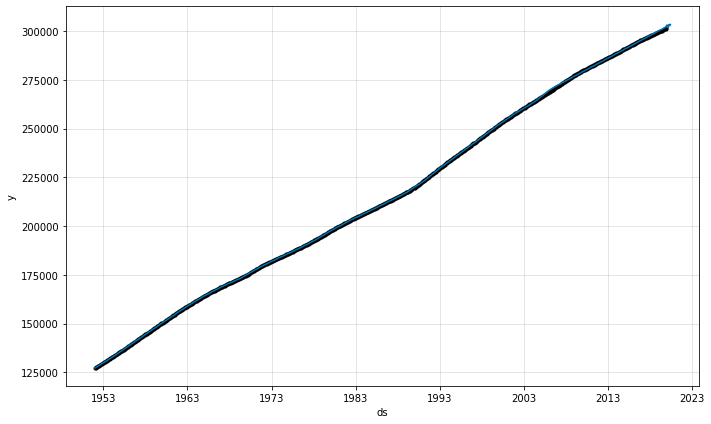

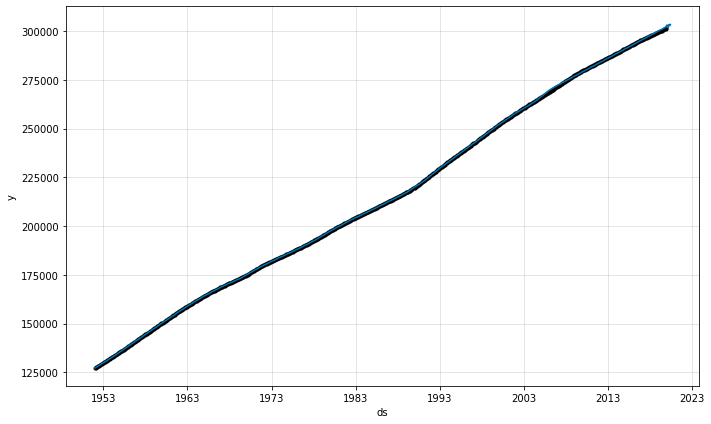

In [37]:
#ploting the predection
model.plot(future_predection)

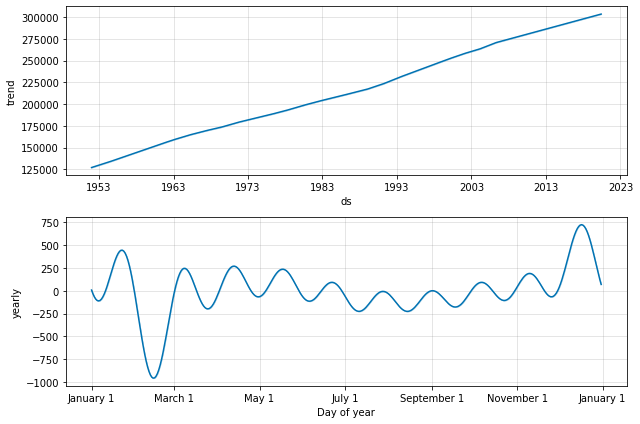

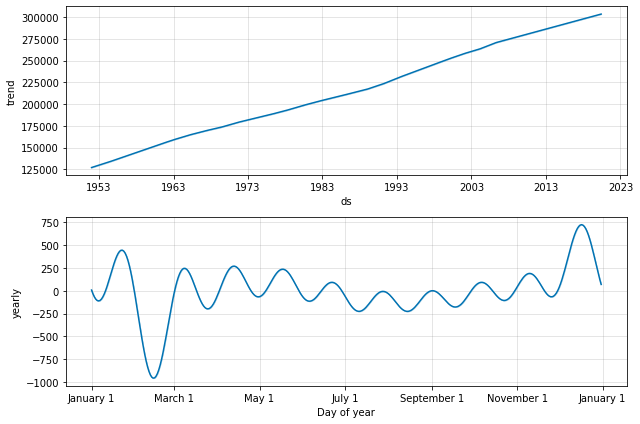

In [38]:
#visuval plot
model.plot_components(future_predection)